In [51]:
# import lib
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
from config import  api_key
from pprint import pprint
import pydbgen
from pydbgen import pydbgen
analyzer = SentimentIntensityAnalyzer()

In [76]:
# import csv file to a dataframe
file = "more_reviews_removed_below_1000.csv"
file_pd = pd.read_csv(file, encoding="ISO-8859-1")
file_pd.head(100)

,Unnamed: 0,Business ID,Review,Compound,Business Name,Business Alias,Category,City,State,ZipCode,Lat,Long,Review Count,Rating
0,0,t7LBdL4HifGJlMbn92WX7g,"If you are looking for a reliable, TRUSTWORTHY...",0.6523,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0
1,1,t7LBdL4HifGJlMbn92WX7g,"Tyler is an excellent, knowledgeable, consider...",0.8591,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0
2,2,t7LBdL4HifGJlMbn92WX7g,My teenage son has made some pretty typical 's...,-0.5994,Garretson & Toth,garretson-and-toth-olathe,criminaldefense,Olathe,KS,66061.0,38.881749,-94.819128,3,5.0
3,3,XCuOMk5_1L2g8MWA89AnWw,Dustin Crook truly cares about his clients and...,0.8957,Biesterveld & Crook,biesterveld-and-crook-olathe-2,personal_injury,Olathe,KS,66061.0,38.881777,-94.818943,2,5.0
4,4,XCuOMk5_1L2g8MWA89AnWw,"No matter the obstacles, no matter the time th...",0.2006,Biesterveld & Crook,biesterveld-and-crook-olathe-2,personal_injury,Olathe,KS,66061.0,38.881777,-94.818943,2,5.0
5,5,hqMntgqe6TRRsU80AuboSw,I received severe and permanent injuries to mu...,-0.3818,Martin & Wallentine,martin-and-wallentine-olathe,divorce,Olathe,KS,66061.0,38.882950,-94.819071,1,5.0
6,6,vA-6twDCsqy4vyOuhrNolA,Karen handled my case 8 years ago. Her and th...,0.6990,W M Law,w-m-law-olathe,bankruptcy,Olathe,KS,66062.0,38.918070,-94.760410,2,5.0
7,7,vA-6twDCsqy4vyOuhrNolA,"A few years ago, my husband and I made the dif...",0.4588,W M Law,w-m-law-olathe,bankruptcy,Olathe,KS,66062.0,38.918070,-94.760410,2,5.0
8,8,vJyDEW2TawvUNFZaaXdOIA,IMHO: \r\r\nHeather served as GAL for my child...,-0.5423,Landon Law,landon-law-olathe,divorce,Olathe,KS,66061.0,38.883330,-94.819110,1,1.0
9,9,ATE-HxfP_1gTD1luyWgJ0w,I chose Kenny law firm for my divorce...big bi...,-0.6476,Kenney Law Firm,kenney-law-firm-olathe,duilawyers,Olathe,KS,66061.0,38.883330,-94.819110,1,1.0


In [53]:
# dataframe of unique business count & unique review count
# unique_business_category = file_pd[["Category","Business ID"]].drop_duplicates()
# unique_business_category_count = unique_business_category.groupby(["Category"]).count()
# unique_review_category = file_pd[["Business ID","Review Count"]].drop_duplicates()

# # group by categories
# file_category = file_pd[["Category","Business ID","Rating","Compound"]]


# category_mean =  file_category.groupby(["Category"]).mean()


# merge_table_1 = pd.merge(unique_business_category_count, category_mean, on="Category")
# merge_table_1
# merge_table_2 = pd.merge(merge_table_1, unique_review_category, on="Business ID")

# del merge_table_2["Compound_x"]
# organized_category = merge_table_2.rename(columns={"Rating_x":"Business Count", 
#                                                    "Rating_y":"Average Rating", "Compound_y":"Average Compound"})
# organized_category["Average Rating"] = organized_category["Average Rating"].map("{:.2f}".format)
# organized_category["Average Compound"] = organized_category["Average Compound"].map("{:.2f}".format)




In [77]:
# group by categories
file_category = file_pd[["Category","Rating","Compound"]]
file_category_1 = file_pd[["Category","Review Count"]]

category_business_count = file_category.groupby(["Category"]).count()
category_mean =  file_category.groupby(["Category"]).mean()
category_review_count = file_category_1.groupby(["Category"]).sum()

merge_table_1 = pd.merge(category_business_count, category_mean, on="Category")
merge_table_2 = pd.merge(merge_table_1, category_review_count, on="Category")
del merge_table_2["Compound_x"]
organized_category = merge_table_2.rename(columns={"Rating_x":"Business Count", 
                                                   "Rating_y":"Average Rating", "Compound_y":"Average Compound"})
organized_category["Average Rating"] = organized_category["Average Rating"].map("{:.2f}".format)
organized_category["Average Compound"] = organized_category["Average Compound"].map("{:.2f}".format)
# del organized_category["Business Count"]
# del organized_category["Review Count"]
organized_category

,Business Count,Average Rating,Average Compound,Review Count
Category,,,,
bankruptcy,741,4.13,0.33,4869
criminaldefense,1001,4.50,0.32,11866
divorce,1920,3.88,0.28,11112
duilawyers,224,4.56,0.30,6384
immigrationlawyers,314,4.70,0.48,4017
personal_injury,1821,4.39,0.26,18314
realestatelawyers,423,4.48,0.36,4062


In [78]:
# # create no_dup dataframe
# unique_business_state = file_pd[["State","Business ID"]].drop_duplicates()
# unique_business_state_count = unique_business_state.groupby(["State"]).count()


# group by states
file_state = file_pd[["State","Rating","Compound"]]
file_state_1 = file_pd[["State","Review Count"]]
state_business_count = file_state.groupby(["State"]).count()
state_mean =  file_state.groupby(["State"]).mean()
state_review_count = file_state_1.groupby(["State"]).sum()
merge_table_3 = pd.merge(state_business_count, state_mean, on="State")
merge_table_4 = pd.merge(merge_table_3, state_review_count, on="State")
del merge_table_4["Compound_x"]
organized_state = merge_table_4.rename(columns={"Rating_x":"Business Count", "Rating_y":"Average Rating"
                                               , "Compound_y":"Average Compound"})
organized_state["Average Rating"] = organized_state["Average Rating"].map("{:.2f}".format)
organized_state["Average Compound"] = organized_state["Average Compound"].map("{:.2f}".format)
# del organized_state["Business Count"]
# del organized_state["Review Count"]
# organized_state = organized_state.sort_values["Review Count"]
organized_state


,Business Count,Average Rating,Average Compound,Review Count
State,,,,
AK,12,4.33,0.51,22
AL,62,3.71,0.20,123
AR,26,3.96,0.40,52
AZ,111,4.50,0.31,714
CA,1430,4.65,0.35,36642
CO,93,4.11,0.27,262
CT,34,3.84,0.19,56
DE,2,3.00,0.40,2
FL,446,4.40,0.34,2825


In [56]:
# bin by review ratings
# x= organized_category["Average Rating"].astype(int)
# bins = [0, 1, 2, 3, 4, 5]
# group_names = ["One Star", "Two Stars", "Three Stars", "Four Stars", "Five Stars"]
# organized_category["Rating Summary"] = pd.cut(organized_category["Average Rating"], bins, labels=group_names)
# organized_category

<IPython.core.display.Javascript object>


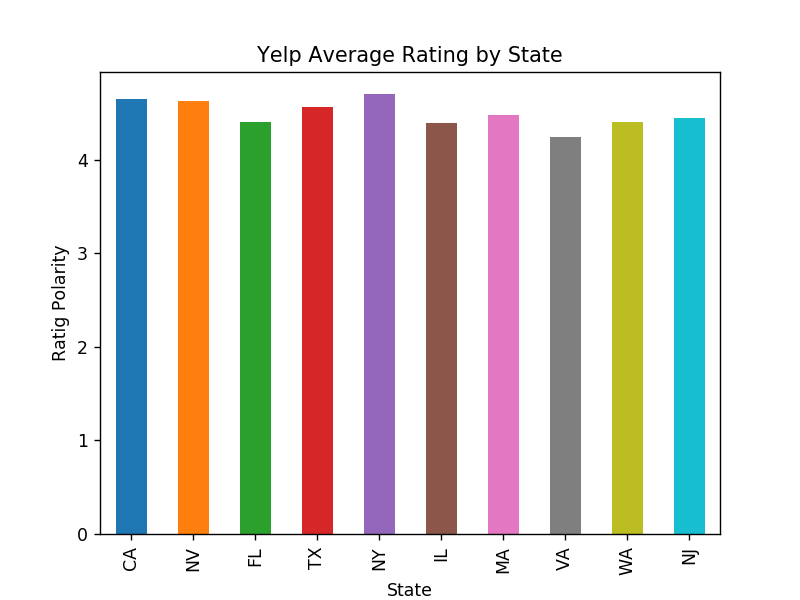

In [79]:
# Chart by category by average rating
organized_category["Average Rating"]=pd.to_numeric(organized_category["Average Rating"])
organized_category["Average Rating"].plot(kind="bar")
plt.title("Yelp Average Rating by Lawyer Type")
plt.ylabel("Ratig Polarity")


# plt.figure(figsize=(10, 3))  # width:20, height:3
plt.savefig("rating_by_category1.png")

plt.show()

In [81]:
# Chart by state by average rating
organized_state["Average Rating"]=pd.to_numeric(organized_state["Average Rating"])
organized_state["Average Rating"].plot(kind="bar")
plt.title("Yelp Average Rating by State")
plt.ylabel("Ratig Polarity")
plt.savefig("rating_by_state1.png")
plt.show()


In [82]:
# plt.scatter(organized_state["Average Rating"], organized_state["Average Compound"], marker="o", facecolors="red", edgecolors="black",
#             s=organized_state["Average Rating"], alpha=0.75)

In [83]:
top_category = organized_category.sort_values("Review Count", ascending=False)
top_category.head()

,Business Count,Average Rating,Average Compound,Review Count
Category,,,,
personal_injury,1821,4.39,0.26,18314
criminaldefense,1001,4.50,0.32,11866
divorce,1920,3.88,0.28,11112
duilawyers,224,4.56,0.30,6384
bankruptcy,741,4.13,0.33,4869


In [84]:
top_state = organized_state.sort_values("Review Count", ascending=False)
top = top_state.head(10)
top["Average Rating"]=pd.to_numeric(top["Average Rating"])
top["Average Rating"].plot(kind="bar")
plt.title("Yelp Average Rating by State")
plt.ylabel("Ratig Polarity")
plt.savefig("top_10_states.png")
plt.show()


C:\Users\mchen\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
